In [1]:
!pip install -q pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
df = pd.read_csv("/content/Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [12]:
# Drop or fill missing values
df = df.dropna()

In [13]:
# a target variable 'High_Sales'
# Define high sales as sales greater than or equal to mean sales
threshold = df['Weekly_Sales'].mean()
df['High_Sales'] = df['Weekly_Sales'].apply(lambda x: 1 if x >= threshold else 0)

In [14]:
# Drop unnecessary columns
# Drop 'Date', 'Weekly_Sales' to prevent data leakage
features = df.drop(columns=['Weekly_Sales', 'High_Sales', 'Date'], errors='ignore')
target = df['High_Sales']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Evaluate model
y_pred = model.predict(X_test_scaled)

In [20]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.6130536130536131

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       702
           1       0.58      0.55      0.57       585

    accuracy                           0.61      1287
   macro avg       0.61      0.61      0.61      1287
weighted avg       0.61      0.61      0.61      1287



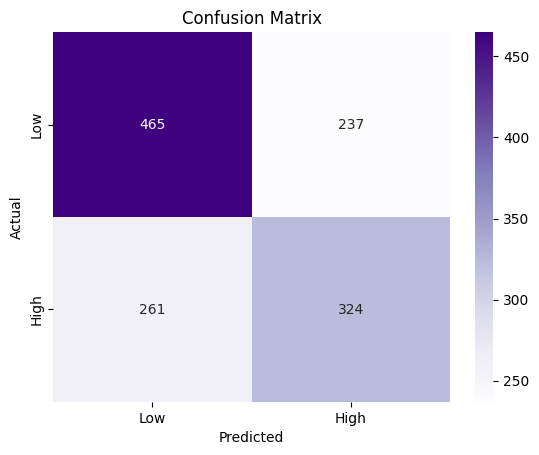

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Predict on new data (example row from dataset)
sample = features.sample(1)
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print(f"Sample Input:\n{sample}")
print("Prediction: ", "High Sales" if prediction[0] == 1 else "Low Sales")

Sample Input:
      Store  Holiday_Flag  Temperature  Fuel_Price        CPI  Unemployment
2958     21             0        46.54       3.112  218.99955         7.441
Prediction:  Low Sales


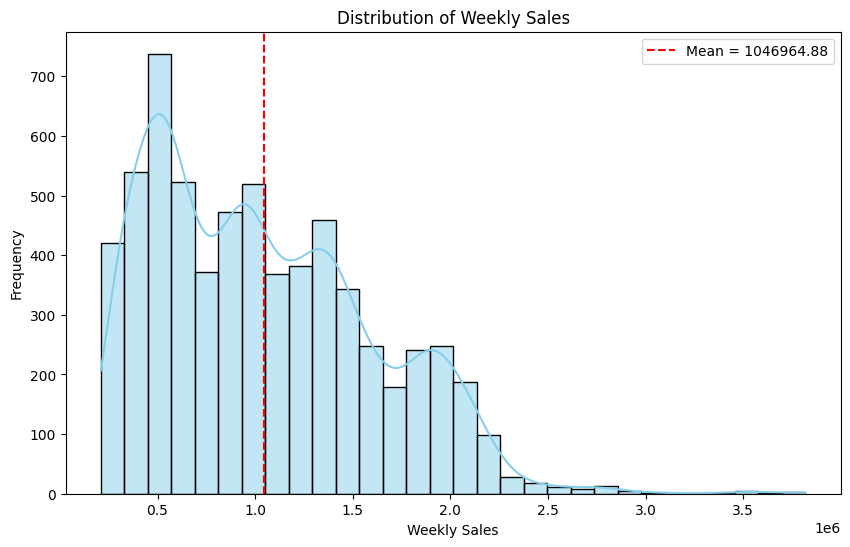

In [23]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f"Mean = {threshold:.2f}")
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.legend()
plt.show()

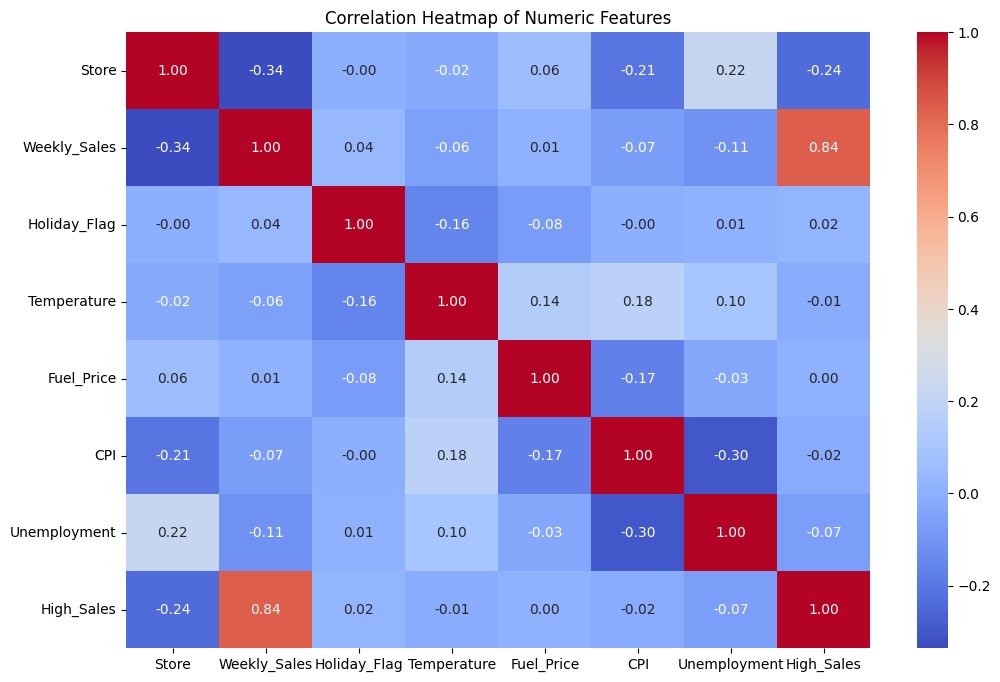

In [24]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<ipython-input-26-1878268985>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index, y=top_stores.values, palette='viridis')


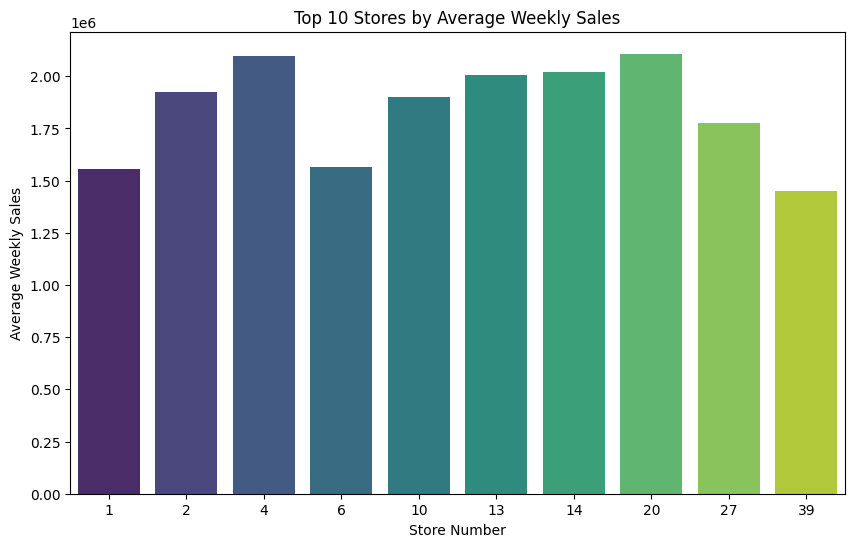

In [26]:
# Average Weekly Sales by Store (Top 10)
top_stores = df.groupby("Store")['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, palette='viridis')
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store Number")
plt.ylabel("Average Weekly Sales")
plt.show()